<a href="https://colab.research.google.com/github/andreas-gre/Stock-prediction-LSTM/blob/main/CMT307_Coursework_2_Descriptive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [ ]:
pip install yfinance

     |████████████████████████████████| 5.5MB 7.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=69092bb6c313c06aa11d8d752bfbc664665b4f747ed2264cf081e3fc68919f00
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# Import relevant modules

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Stock info

amazon = yf.Ticker("AMZN")
amazon.info

{'52WeekChange': 0.5128782,
 'SandP52WeekChange': 0.47778475,
 'address1': '410 Terry Avenue North',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 0,
 'askSize': 1100,
 'averageDailyVolume10Day': 3417942,
 'averageVolume': 3479468,
 'averageVolume10days': 3417942,
 'beta': 1.123,
 'beta3Year': None,
 'bid': 0,
 'bidSize': 1300,
 'bookValue': 185.694,
 'category': None,
 'circulatingSupply': None,
 'city': 'Seattle',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'dateShortInterest': 1618444800,
 'dayHigh': 3514.445,
 'dayLow': 3435,
 'dividendRate': None,
 'dividendYield': None,
 'earningsQuarterlyGrowth': 1.21,
 'enterpriseToEbitda': 36.519,
 'enterpriseToRevenue': 4.555,
 'enterpriseValue': 1758411620352,
 'exDividendDate': None,
 'exchange': 'NMS',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'expireDate': None,
 'fiftyDayAverage': 3227.384,
 'fiftyTwoWeekHigh': 3552.25

# Obtain Data

In [ ]:
# Get historical market data

df = amazon.history(period = 'max')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000,0,0.0
1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000,0,0.0
1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800,0,0.0
1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200,0,0.0
1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200,0,0.0
...,...,...,...,...,...,...,...
2021-04-23,3319.100098,3375.000000,3308.500000,3340.879883,3192800,0,0.0
2021-04-26,3348.000000,3428.449951,3330.939941,3409.000000,4880700,0,0.0
2021-04-27,3443.469971,3460.000000,3398.010010,3417.429932,3827100,0,0.0


In [ ]:
# Reset index

df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000,0,0.0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000,0,0.0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800,0,0.0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200,0,0.0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200,0,0.0


# Data Description

In [ ]:
# Check the shape of the DataFrame

df.shape

(6029, 8)

In [ ]:
# Check column names and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6029 entries, 0 to 6028
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6029 non-null   datetime64[ns]
 1   Open          6029 non-null   float64       
 2   High          6029 non-null   float64       
 3   Low           6029 non-null   float64       
 4   Close         6029 non-null   float64       
 5   Volume        6029 non-null   int64         
 6   Dividends     6029 non-null   int64         
 7   Stock Splits  6029 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 376.9 KB


In [ ]:
# Check if the dataset has any null values

df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
# Check if there is any missing data

df.isna().any().any()

False

In [ ]:
# Five-number summaries for all numeric features

df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6029.000000,6029.000000,6029.000000,6029.000000,6.029000e+03,6029.0,6029.000000
mean,460.669077,465.869912,454.901071,460.568726,7.414470e+06,0.0,0.001161
std,757.919855,766.134874,748.486088,757.446053,7.196882e+06,0.0,0.053093
min,1.406250,1.447917,1.312500,1.395833,4.872000e+05,0.0,0.000000
25%,38.400002,39.099998,37.830002,38.459999,3.646700e+06,0.0,0.000000
50%,88.230003,90.570000,86.160004,88.375000,5.567100e+06,0.0,0.000000
75%,424.799988,427.510010,421.429993,423.670013,8.377500e+06,0.0,0.000000
max,3547.000000,3552.250000,3486.689941,3531.449951,1.043292e+08,0.0,3.000000


In [ ]:
# Skewness of data

df.skew()

Open             2.215475
High             2.219661
Low              2.209833
Close            2.213382
Volume           4.525319
Dividends        0.000000
Stock Splits    47.614478
dtype: float64

In [ ]:
# Unique values in 'Stock Splits' column

df['Stock Splits'].unique()

array([0., 2., 3.])

# Exploratory Analysis

## Historical Stock Price

In [ ]:
# Amazon share price (all-time)

fig = go.Figure([go.Scatter(x = df['Date'], y = df['Close'])])
fig.update_layout(
    title_text = 'Amazon Share Price',
    yaxis_tickformat = 'M'
)

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1m', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6m', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')
        ])
    )
)

# Set x-axis title
fig.update_xaxes(title_text = 'Date')

# Set y-axis title
fig.update_yaxes(title_text = 'Price')
fig.show()

## Volume of Shares Traded

In [ ]:
# Volume of trades in descending order

df.sort_values(['Volume'], ascending = False).groupby('Volume').head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2500,2007-04-25,53.119999,57.180000,52.950001,56.810001,104329200,0,0.0
401,1998-12-16,43.187500,50.291668,43.166668,48.166668,101797200,0,0.0
386,1998-11-24,37.333332,38.854168,34.166668,35.750000,81675600,0,0.0
598,1999-09-29,66.500000,85.000000,65.750000,80.750000,79374400,0,0.0
2313,2006-07-26,28.760000,29.000000,25.959999,26.260000,76985200,0,0.0
...,...,...,...,...,...,...,...,...
11,1997-06-02,1.510417,1.531250,1.500000,1.510417,591600,0,0.0
62,1997-08-13,2.229167,2.229167,2.166667,2.197917,590400,0,0.0
45,1997-07-21,2.177083,2.197917,2.145833,2.182292,574800,0,0.0
61,1997-08-12,2.281250,2.302083,2.197917,2.197917,571200,0,0.0


In [ ]:
# Total number of trades of Amazon stock

total_trades = sum(df['Volume'])
total_trades

44701838200

In [ ]:
# Daily average                                                     

total_trades / len(df)

7414469.76281307

In [ ]:
# Volume of trades all-time

fig = go.Figure(data = go.Bar(x = df['Date'], y = df['Volume'], name = 'Volume'))
fig.update_layout(
    title_text = 'Volume of Amazon Shares Traded',
    yaxis_tickformat = 'M'
)

fig.update_traces(marker_color = 'green')
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1m', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6m', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')
        ])
    )
)

# Set x-axes title
fig.update_xaxes(title_text = 'Date')

# Set y-axes title
fig.update_yaxes(title_text = 'Volume')
fig.show()

In [ ]:
# Spike in trading around mid-2007
# Record in question is in row 2500 

df['Volume'].argmax()

2500

In [ ]:
# View entire row

df.iloc[[df['Volume'].argmax()]]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2500,2007-04-25,53.119999,57.18,52.950001,56.810001,104329200,0,0.0


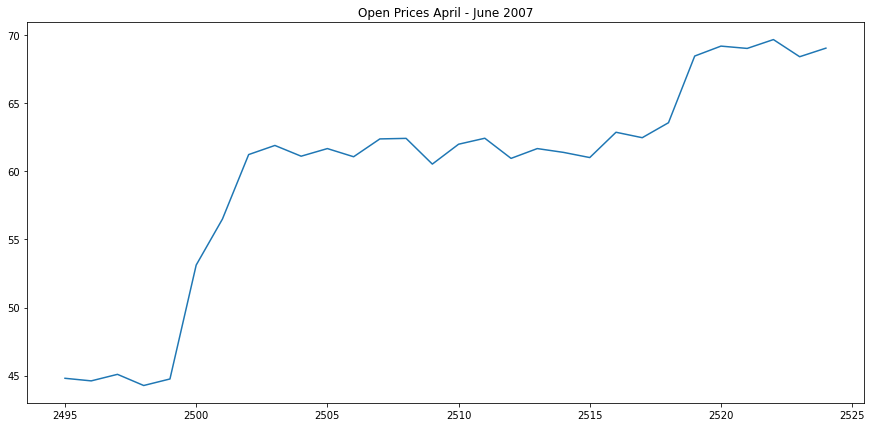

In [ ]:
# Plot open price around this point

df.iloc[2495:2525]['Open'].plot(figsize = (15, 7))
plt.title('Open Prices April - June 2007')
plt.show()

## Market Capitalisation

In [ ]:
# Total money traded (not actual market cap)

df['Total Traded'] = df['Open'] * df['Volume']
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000,0,0.0,1.758802e+08
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000,0,0.0,2.894062e+07
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800,0,0.0,1.075051e+07
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200,0,0.0,9.453702e+06
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200,0,0.0,3.083284e+07


In [ ]:
# Amazon share price (all-time)

fig = go.Figure([go.Scatter(x = df['Date'], y = df['Total Traded'])])
fig.update_layout(
    title_text = 'Total Money Traded',
    yaxis_tickformat = 'M'
)

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1m', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6m', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')
        ])
    )
)

# Set x-axis title
fig.update_xaxes(title_text = 'Date')

# Set y-axis title
fig.update_yaxes(title_text = 'Value in USD')

fig.show()

## Moving Average

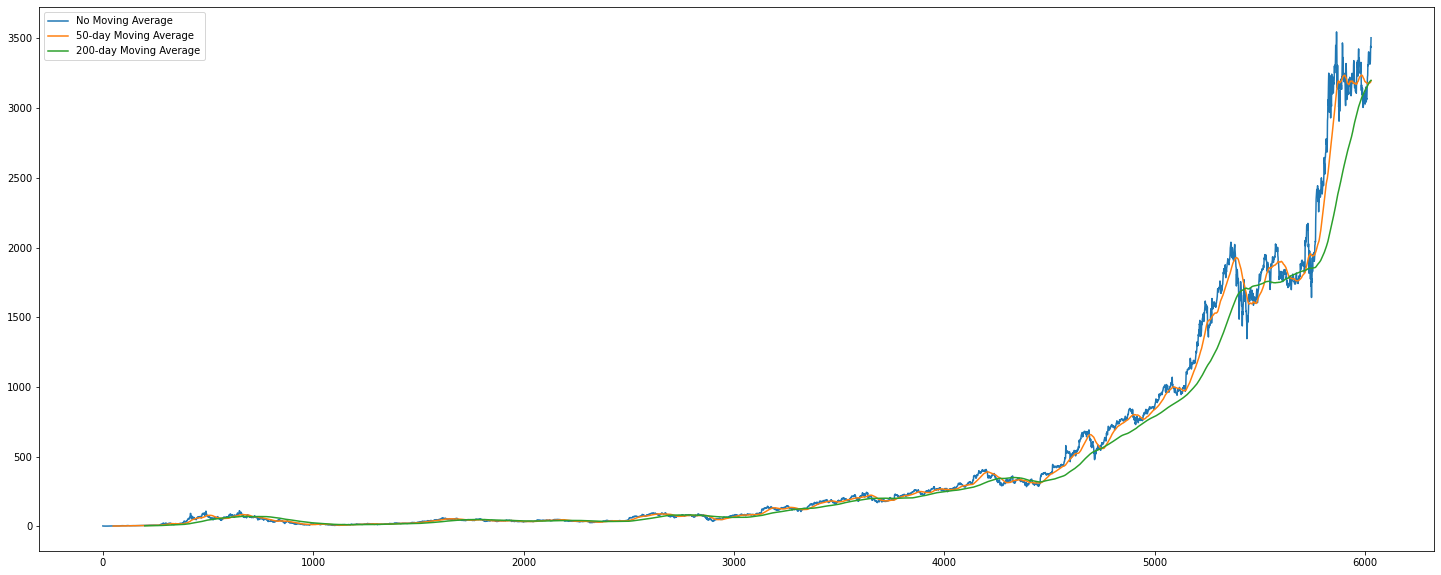

In [ ]:
# Share price with moving average

df['Open'].plot(label = 'No Moving Average', figsize = (25,10))
df['Open'].rolling(50).mean().plot(label = '50-day Moving Average')
df['Open'].rolling(200).mean().plot(label = '200-day Moving Average')
plt.legend()

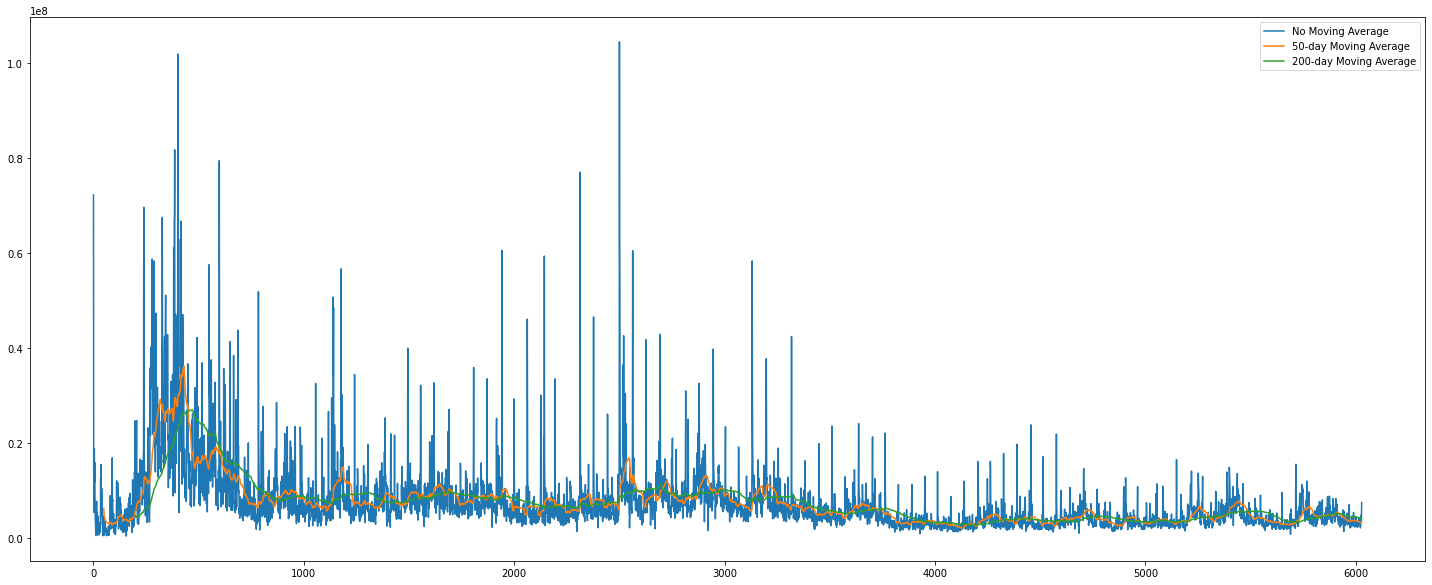

In [ ]:
# Volume of trades with moving average

df['Volume'].plot(label = 'No Moving Average', figsize = (25,10))
df['Volume'].rolling(50).mean().plot(label = '50-day Moving Average')
df['Volume'].rolling(200).mean().plot(label = '200-day Moving Average')
plt.legend()

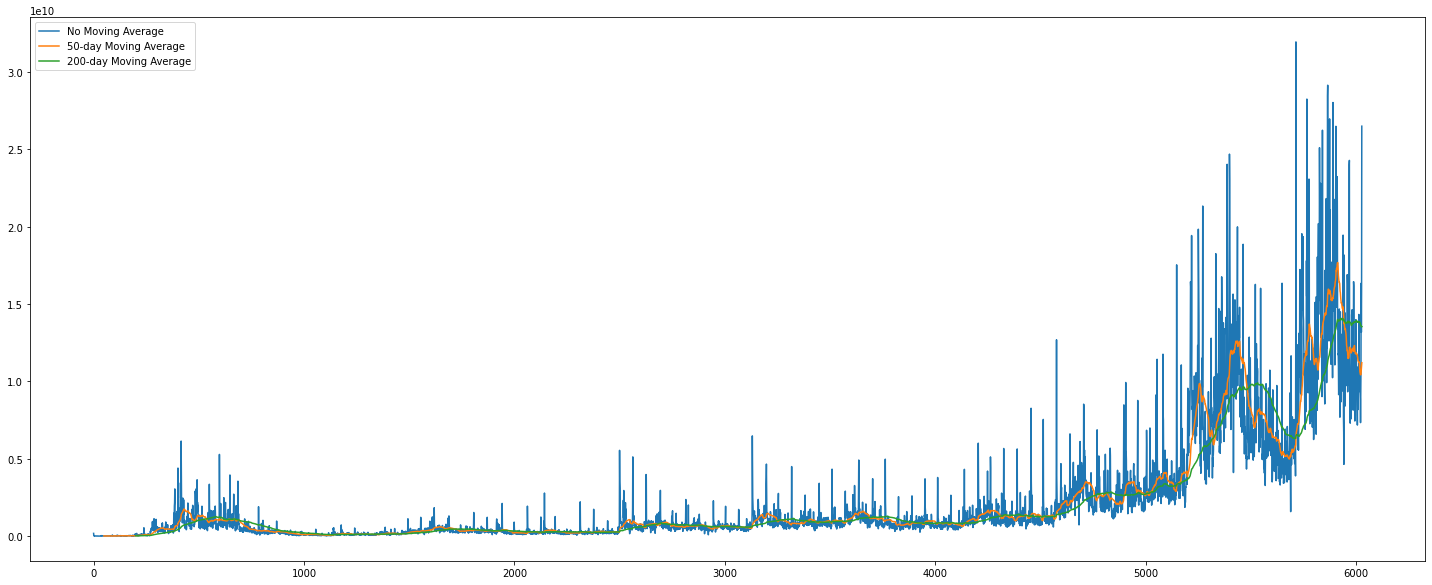

In [ ]:
# Total traded with moving average

df['Total Traded'].plot(label = 'No Moving Average', figsize = (25,10))
df['Total Traded'].rolling(50).mean().plot(label = '50-day Moving Average')
df['Total Traded'].rolling(200).mean().plot(label = '200-day Moving Average')
plt.legend()

## Candlestick Chart

In [ ]:
# Creating candlestick chart with range slider

fig = go.Figure(data = [go.Candlestick(x = df['Date'],
                                     open = df['Open'],
                                     high = df['High'],
                                     low = df['Low'],
                                     close = df['Close']
                                     )])

fig.update_layout(
    title_text = 'Candlestick Chart - Amazon',
    yaxis_tickformat = 'M'
)

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
                        dict(count = 1, label = '1m', step = 'month', stepmode = 'backward'),
                        dict(count = 6, label = '6m', step = 'month', stepmode = 'backward'),
                        dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
                        dict(count = 1, label = '1y', step = 'year', stepmode = 'backward'),
                        dict(step = 'all')

        ])
    )
)

# Set x-axes title
fig.update_xaxes(title_text = 'Date')

# Set y-axes title
fig.update_yaxes(title_text = 'Price')

fig.show()

## Daily Percentage Change

In [ ]:
# All-time

df['Returns'] = (df['Close'] / df['Close'].shift(1)) - 1
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded,Returns
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000,0,0.0,1.758802e+08,NaN
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000,0,0.0,2.894062e+07,-0.117021
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800,0,0.0,1.075051e+07,-0.012049
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200,0,0.0,9.453702e+06,-0.042683
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200,0,0.0,3.083284e+07,-0.127389


## Returns

In [ ]:
# Amazon stock returns

fig = go.Figure([go.Scatter(x = df['Date'], y = df['Returns'])])
fig.update_layout(
    title_text = 'Returns',
    yaxis_tickformat = 'M'
)

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1m', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6m', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')
        ])
    )
)

# Set x-axis title
fig.update_xaxes(title_text = 'Date')

# Set y-axis title
fig.update_yaxes(title_text = 'Percentage Return')

fig.show()

## Volatility

Text(0.5, 1.0, 'Histogram of Amazon Returns')

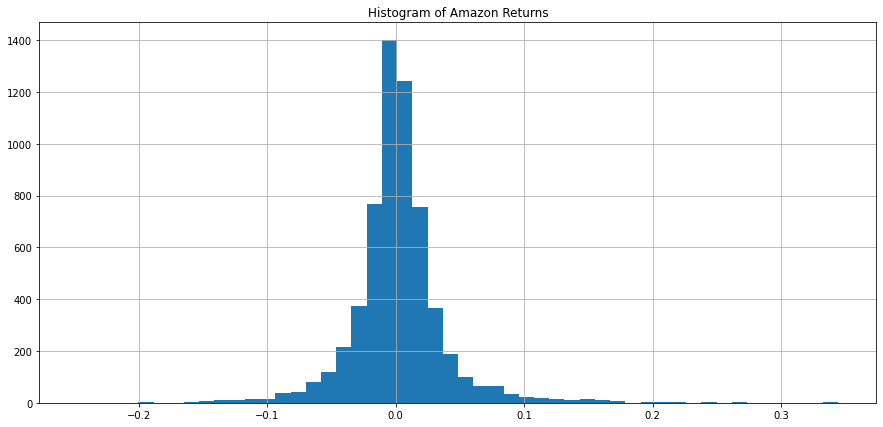

In [ ]:
# Histogram of returns column

df['Returns'].hist(bins = 50, figsize = (15,7))
plt.title('Histogram of Amazon Returns')

In [ ]:
# Data from 1st of January 2010 until 19th January 2021

jan_2010_2021 = df[(df['Date'] >= '2010-01-01') & (df['Date'] <= '2021-01-19')]
jan_2010_2021

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded,Returns,Cumulative Return
3179,2010-01-04,136.250000,136.610001,133.139999,133.899994,7599900,0,0.0,1.035486e+09,-0.004609,68.374476
3180,2010-01-05,133.429993,135.479996,131.809998,134.690002,8851900,0,0.0,1.181109e+09,0.005900,68.777885
3181,2010-01-06,134.600006,134.729996,131.649994,132.250000,7178800,0,0.0,9.662665e+08,-0.018116,67.531926
3182,2010-01-07,132.009995,132.320007,128.800003,130.000000,11030200,0,0.0,1.456097e+09,-0.017013,66.382989
3183,2010-01-08,130.559998,133.679993,129.029999,133.520004,9830500,0,0.0,1.283470e+09,0.027077,68.180439
...,...,...,...,...,...,...,...,...,...,...,...
5954,2021-01-12,3120.000000,3142.139893,3086.000000,3120.830078,3514600,0,0.0,1.096555e+10,0.002126,1593.615618
5955,2021-01-13,3128.439941,3189.949951,3122.080078,3165.889893,3321200,0,0.0,1.039017e+10,0.014438,1616.624888
5956,2021-01-14,3167.520020,3178.000000,3120.590088,3127.469971,3070900,0,0.0,9.727137e+09,-0.012136,1597.006202
5957,2021-01-15,3123.020020,3142.550049,3095.169922,3104.250000,4244000,0,0.0,1.325410e+10,-0.007425,1585.149193


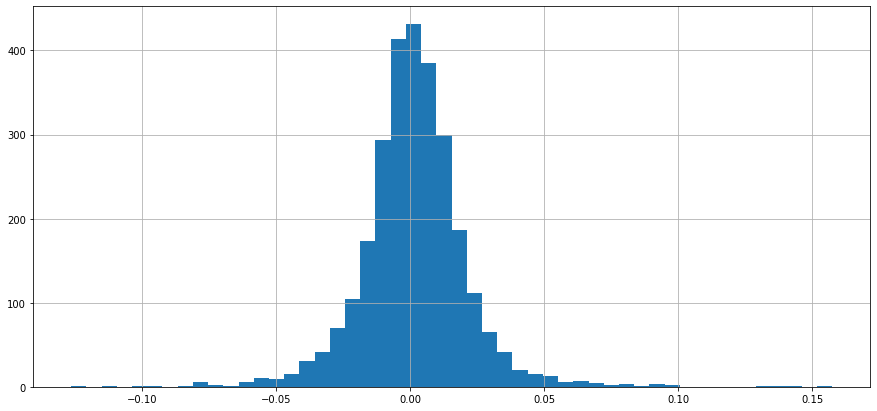

In [ ]:
# Histogram of returns column 1st of January 2010 until 19th January 2021

jan_2010_2021['Returns'].hist(bins = 50, figsize = (15,7))

In [ ]:
# Data from 19th January 2021 until 5th April 

jan_apr_2021 = df[(df['Date'] >= '2021-01-19') & (df['Date'] <= '2021-04-05')]
jan_apr_2021.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded,Returns,Cumulative Return
5958,2021-01-19,3107.000000,3145.000000,3096.000000,3120.760010,3305100,0,0.0,1.026895e+10,0.005319,1593.579838
5959,2021-01-20,3181.989990,3279.800049,3175.000000,3263.379883,5309800,0,0.0,1.689573e+10,0.045700,1666.407019
5960,2021-01-21,3293.000000,3348.550049,3289.570068,3306.989990,4945100,0,0.0,1.628421e+10,0.013363,1688.676014
5961,2021-01-22,3304.310059,3321.909912,3283.159912,3292.229980,2821900,0,0.0,9.324433e+09,-0.004463,1681.138986
5962,2021-01-25,3328.500000,3363.889893,3243.149902,3294.000000,3749800,0,0.0,1.248121e+10,0.000538,1682.042826


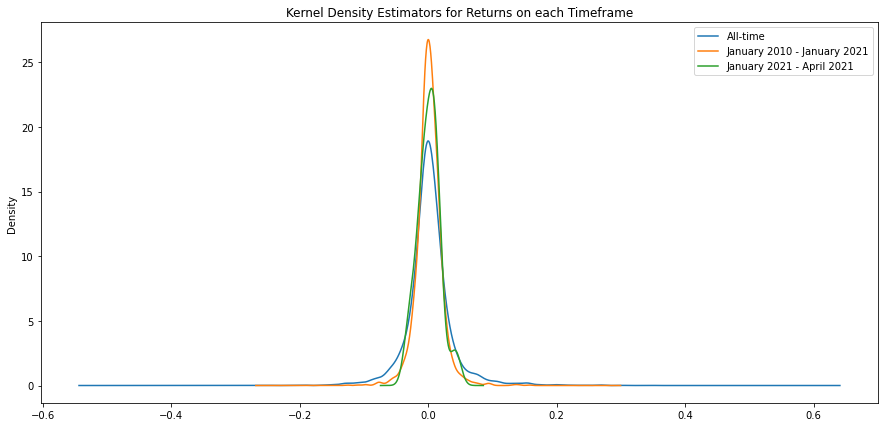

In [ ]:
# Kernel density estimator

df['Returns'].plot(kind = 'kde', label = 'All-time', figsize = (15,7))
jan_2010_2021['Returns'].plot(kind = 'kde', label = 'January 2010 - January 2021')
jan_apr_2021['Returns'].plot(kind = 'kde', label = 'January 2021 - April 2021')
plt.title('Kernel Density Estimators for Returns on each Timeframe')
plt.legend()

## Box Plots

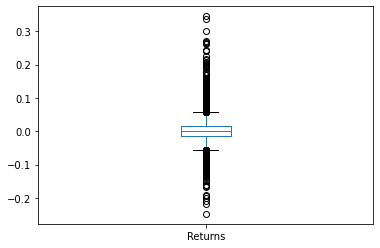

In [ ]:
df['Returns'].plot(kind = 'box')

## Cumulative Return

In [ ]:
df['Cumulative Return'] = (1 + df['Returns']).cumprod()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded,Returns,Cumulative Return
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000,0,0.0,1.758802e+08,NaN,NaN
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000,0,0.0,2.894062e+07,-0.117021,0.882979
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800,0,0.0,1.075051e+07,-0.012049,0.872340
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200,0,0.0,9.453702e+06,-0.042683,0.835107
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200,0,0.0,3.083284e+07,-0.127389,0.728723


In [ ]:
# Cumulative Returns on Amazon stock

fig = go.Figure([go.Scatter(x = df['Date'], y = df['Cumulative Return'])])
fig.update_layout(
    title_text = 'Cumulative Return',
    yaxis_tickformat = 'M'
)

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1m', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6m', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')
        ])
    )
)

# Set x-axis title
fig.update_xaxes(title_text = 'Date')

# Set y-axis title
fig.update_yaxes(title_text = 'Cumulative Return')

fig.show()

## Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c176e17d0>]],
      dtype=object)

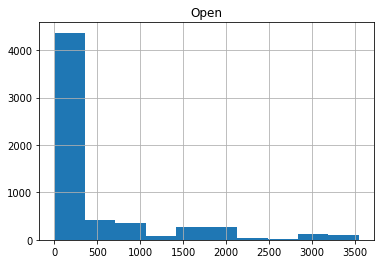

In [ ]:
# Open column

df.hist('Open')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c1775db10>]],
      dtype=object)

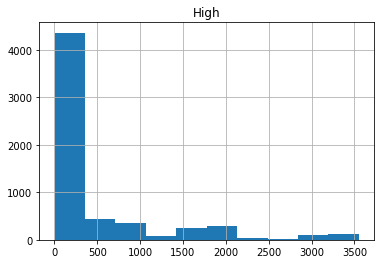

In [ ]:
# High column

df.hist('High')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c1c3dfb90>]],
      dtype=object)

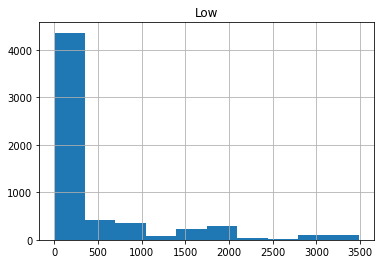

In [ ]:
# Low column

df.hist('Low')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c19e79fd0>]],
      dtype=object)

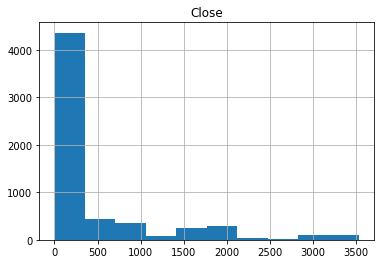

In [ ]:
# Close column

df.hist('Close')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c19bd7390>]],
      dtype=object)

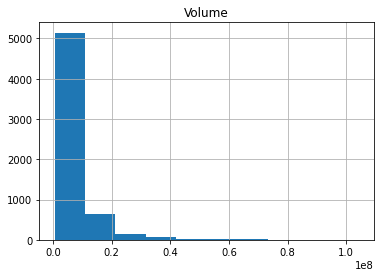

In [ ]:
# Volume column

df.hist('Volume')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c1c04ac90>]],
      dtype=object)

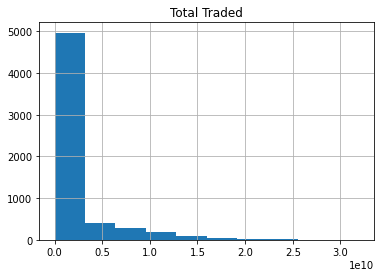

In [ ]:
# Total Traded column

df.hist('Total Traded')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c1c09e290>]],
      dtype=object)

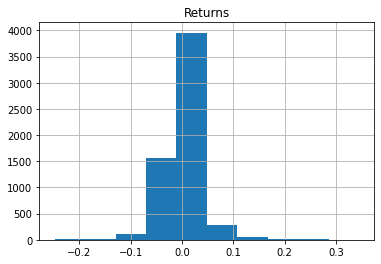

In [ ]:
# Total Traded column

df.hist('Returns')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c19cfb850>]],
      dtype=object)

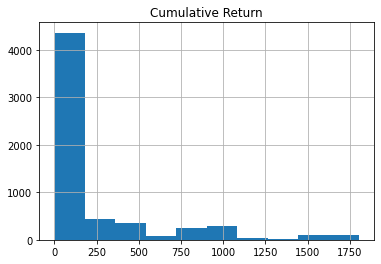

In [ ]:
# Total Traded column

df.hist('Cumulative Return')

## Correlation

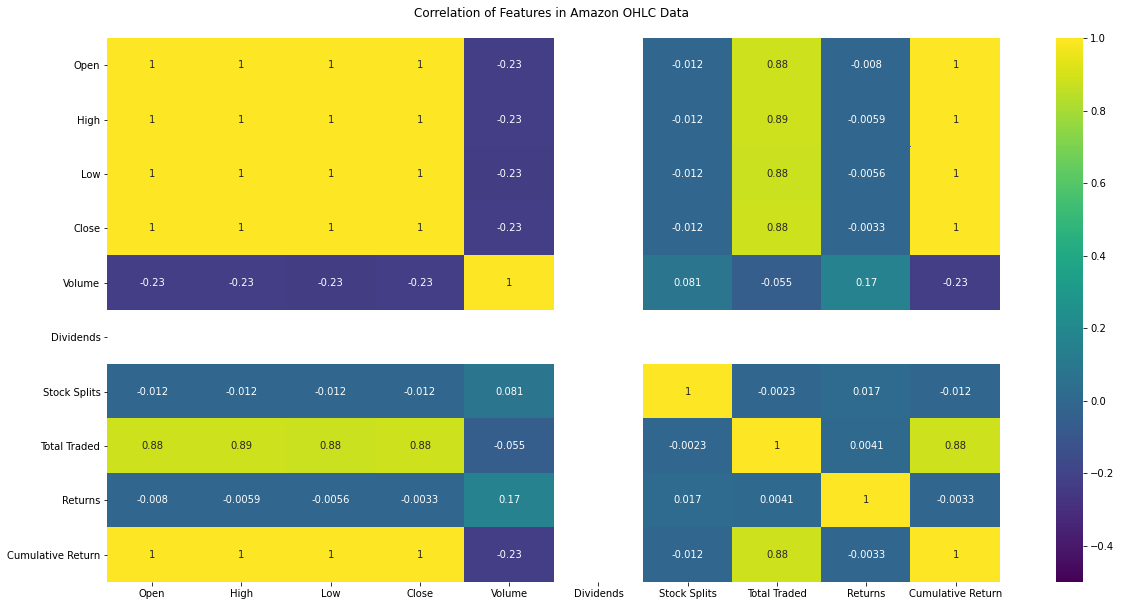

In [ ]:
# Correlation matrix of whole dataset

f, ax = plt.subplots(figsize = (20, 10))
plt.title('Correlation of Features in Amazon OHLC Data \n')
ax = sns.heatmap(df.corr(), annot = True, cmap = 'viridis', vmin = -0.5, vmax = 1)

## Scatter Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c19d7b690>,
      dtype=object)

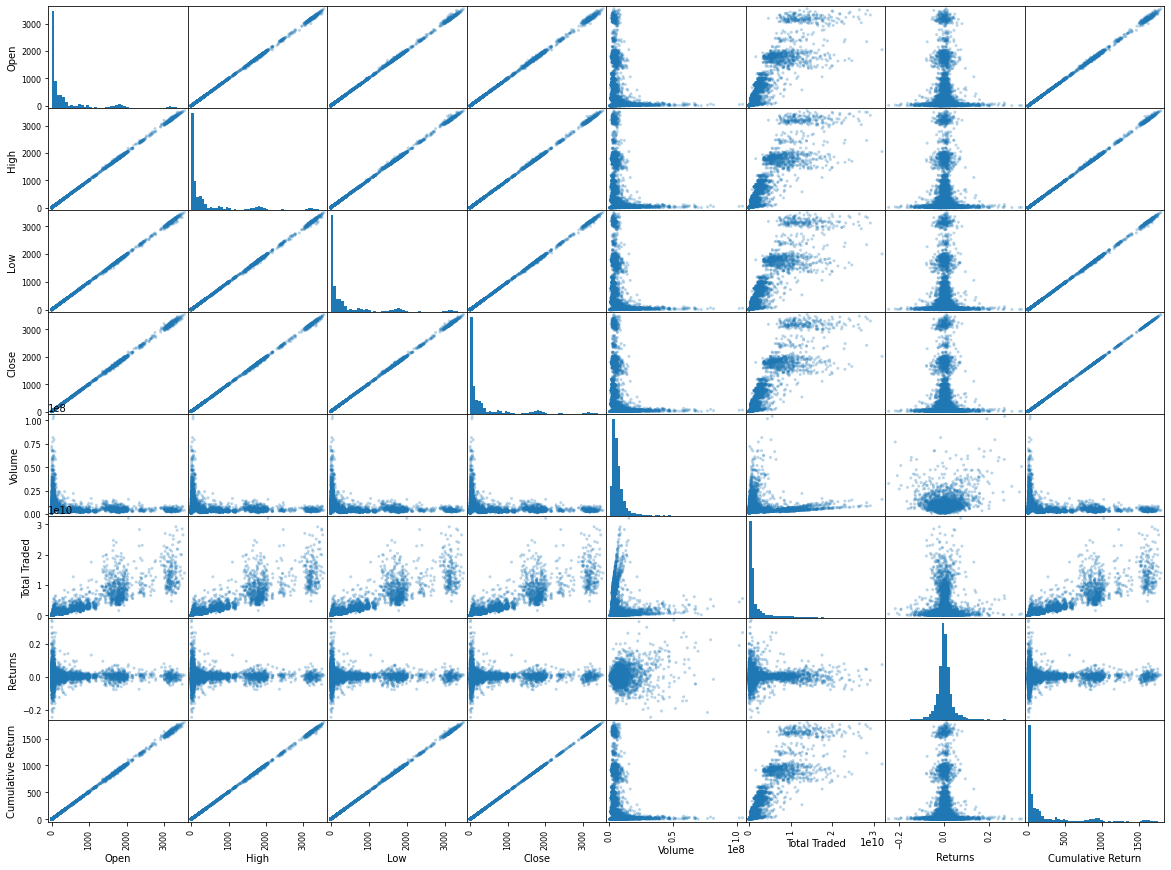

In [ ]:
# Scatter matrix of numeric features

from pandas.plotting import scatter_matrix
scatter_matrix(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Total Traded', 'Returns', 'Cumulative Return']], figsize = (20, 15), hist_kwds = {'bins':50}, alpha = 0.3)